# Comparison with SR1.5

Here we compare our outputs with the output available in the SR1.5 database.

For questions about how to run MAGICC6 in its probabilistic configuration and using MAGICC for scenario assessment, please contact Malte Meinshausen <malte.meinshausen@unimelb.edu.au;malte.meinshausen@climate-resource.com>, Zebedee Nicholls <zebedee.nicholls@climate-energy-college.org> and Jared Lewis <jared.lewis@climate-energy-college.org;jared.lewis@climate-resource.com>. For questions about the data in the SR1.5 scenario database, please contact Keywan Riahi <riahi@iiasa.ac.at> and Daniel HuppMann <huppmann@iiasa.ac.at>.

In [1]:
import os.path

import matplotlib.pyplot as plt
import pandas as pd
import pyam
import pymagicc
import tqdm.autonotebook as tqdman
from scmdata import ScmRun, run_append

from utils import process_temperature_data, get_sr15_scenfiles

<IPython.core.display.Javascript object>

<ipython-input-1-1e46efb9d95d>:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tqdman


In [2]:
DOWNLOAD_SR15_DATA = True
DOWNLOAD_SR15_DATA = False

In [3]:
if DOWNLOAD_SR15_DATA:
    variables_to_download = (
    #     "*Concentration*",
        "*Temperature|Global Mean*",
        "*Temperature|Exceed*",
    #     "*Forcing*",
        "Emissions*",
        "Diagnostics|MAGICC6|Harmonized Input|Emissions|*",
    )
    
    sr15_data = []
    for v in variables_to_download:
        print(f"Downloading {v}")
        df = pyam.read_iiasa(
            "iamc15",
            variable=v,
            region="World",
            meta=["category"]
        )

        meta = df.meta.drop("exclude", axis="columns")
        df_with_meta = meta.join(df.timeseries().reset_index().set_index(meta.index.names))
        df_scmrun = ScmRun(df_with_meta)
        
        sr15_data.append(df_scmrun)
    
    sr15_data = run_append(sr15_data)
    sr15_data.to_csv("sr15_output.csv")
else:
    sr15_data = ScmRun("sr15_output.csv")

In [4]:
sr15_data

<scmdata.ScmRun (timeseries: 38740, timepoints: 101)>
Time:
	Start: 2000-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	                 category              model region                scenario  \
	0      1.5C low overshoot        AIM/CGE 2.0  World  ADVANCE_2020_1.5C-2100   
	1      1.5C low overshoot        AIM/CGE 2.0  World  ADVANCE_2020_1.5C-2100   
	2      1.5C low overshoot        AIM/CGE 2.0  World  ADVANCE_2020_1.5C-2100   
	3      1.5C low overshoot        AIM/CGE 2.0  World  ADVANCE_2020_1.5C-2100   
	4      1.5C low overshoot        AIM/CGE 2.0  World  ADVANCE_2020_1.5C-2100   
	...                   ...                ...    ...                     ...   
	38735            Above 2C  WITCH-GLOBIOM 4.4  World       CD-LINKS_NoPolicy   
	38736            Above 2C  WITCH-GLOBIOM 4.4  World       CD-LINKS_NoPolicy   
	38737            Above 2C  WITCH-GLOBIOM 4.4  World       CD-LINKS_NoPolicy   
	38738            Above 2C  WITCH-GLOBIOM 4.4  World       CD-LINKS_NoPolicy   


In [5]:
sr15_data.get_unique_meta("variable")

['AR5 climate diagnostics|Temperature|Global Mean|FAIR|Expected value',
 'AR5 climate diagnostics|Temperature|Global Mean|FAIR|Expected value|Non CO2',
 'AR5 climate diagnostics|Temperature|Global Mean|FAIR|MED',
 'AR5 climate diagnostics|Temperature|Global Mean|FAIR|MED|Non CO2',
 'AR5 climate diagnostics|Temperature|Global Mean|FAIR|P5',
 'AR5 climate diagnostics|Temperature|Global Mean|FAIR|P5|Non CO2',
 'AR5 climate diagnostics|Temperature|Global Mean|FAIR|P66',
 'AR5 climate diagnostics|Temperature|Global Mean|FAIR|P66|Non CO2',
 'AR5 climate diagnostics|Temperature|Global Mean|FAIR|P90',
 'AR5 climate diagnostics|Temperature|Global Mean|FAIR|P90|Non CO2',
 'AR5 climate diagnostics|Temperature|Global Mean|FAIR|P95',
 'AR5 climate diagnostics|Temperature|Global Mean|FAIR|P95|Non CO2',
 'AR5 climate diagnostics|Temperature|Global Mean|MAGICC6|Expected value',
 'AR5 climate diagnostics|Temperature|Global Mean|MAGICC6|Expected value|Non CO2',
 'AR5 climate diagnostics|Temperature|Glob

In [6]:
magicc_file = os.path.join(
    'output',
#     'magicc_output_2021-06-03.csv'
#     'magicc_output_2021-06-04.csv'
    'magicc_output_2021-06-05.csv'
)

In [7]:
magicc_data = ScmRun(
    pd.read_csv(
        magicc_file,
        index_col=0
    )
)

def get_model(s):
    if "IPCCSR15" not in s:
        return s
    
    out = s.replace("IPCCSR15_", "").split("_")[0]
    
    return out

def get_scenario(s):
    if "IPCCSR15" not in s:
        return s
    
    out = "_".join(s.replace("IPCCSR15_", "").replace("_GAS", "").split("_")[1:])
    
    return out

magicc_data["model"] = magicc_data["scenario"].apply(get_model)
magicc_data["scenario"] = magicc_data["scenario"].apply(get_scenario)

In [8]:
sr15_scen_file_dir = "sr15_scenfiles"
valid_sr15_scen_files = get_sr15_scenfiles(sr15_scen_file_dir)
valid_sr15_scen_files[:10]

['sr15_scenfiles/scenfiles/IPCCSR15_REMIND-MAgPIE 1.7-3.0_PEP_2C_red_netzero_GAS.SCEN',
 'sr15_scenfiles/scenfiles/IPCCSR15_POLES ADVANCE_ADVANCE_2020_Med2C_GAS.SCEN',
 'sr15_scenfiles/scenfiles/IPCCSR15_REMIND-MAgPIE 1.7-3.0_EMF33_Med2C_nobeccs_GAS.SCEN',
 'sr15_scenfiles/scenfiles/IPCCSR15_POLES EMF33_EMF33_Med2C_cost100_GAS.SCEN',
 'sr15_scenfiles/scenfiles/IPCCSR15_REMIND 1.7_CEMICS-2.0-CDR20_GAS.SCEN',
 'sr15_scenfiles/scenfiles/IPCCSR15_MESSAGEix-GLOBIOM 1.0_CD-LINKS_NPi_GAS.SCEN',
 'sr15_scenfiles/scenfiles/IPCCSR15_MERGE-ETL 6.0_BAU_GAS.SCEN',
 'sr15_scenfiles/scenfiles/IPCCSR15_MESSAGE-GLOBIOM 1.0_EMF33_1.5C_cost100_GAS.SCEN',
 'sr15_scenfiles/scenfiles/IPCCSR15_GCAM 4.2_SSP5-45_GAS.SCEN',
 'sr15_scenfiles/scenfiles/IPCCSR15_IMAGE 3.0.2_EMF33_WB2C_cost100_GAS.SCEN']

In [9]:
def read_sr15_scenfile(sf):
    out = pymagicc.io.MAGICCData(sf)
    out["scenario"] = os.path.basename(sf).replace(".SCEN", "")
    
    return out


sr15_scenfiles = run_append([
    read_sr15_scenfile(s)
    for s in tqdman.tqdm(valid_sr15_scen_files)
])

sr15_scenfiles["model"] = sr15_scenfiles["scenario"].apply(get_model)
sr15_scenfiles["scenario"] = sr15_scenfiles["scenario"].apply(get_scenario)
sr15_scenfiles["model_scenario"] = sr15_scenfiles["model"] + " - " + sr15_scenfiles["scenario"]
sr15_scenfiles

  0%|          | 0/411 [00:00<?, ?it/s]

<scmdata.ScmRun (timeseries: 9453, timepoints: 31)>
Time:
	Start: 2000-01-01T00:00:00
	End: 2110-01-01T00:00:00
Meta:
	     climate_model                  model  \
	0      unspecified  REMIND-MAgPIE 1.7-3.0   
	1      unspecified  REMIND-MAgPIE 1.7-3.0   
	2      unspecified  REMIND-MAgPIE 1.7-3.0   
	3      unspecified  REMIND-MAgPIE 1.7-3.0   
	4      unspecified  REMIND-MAgPIE 1.7-3.0   
	...            ...                    ...   
	9448   unspecified  REMIND-MAgPIE 1.7-3.0   
	9449   unspecified  REMIND-MAgPIE 1.7-3.0   
	9450   unspecified  REMIND-MAgPIE 1.7-3.0   
	9451   unspecified  REMIND-MAgPIE 1.7-3.0   
	9452   unspecified  REMIND-MAgPIE 1.7-3.0   
	
	                                   model_scenario region             scenario  \
	0      REMIND-MAgPIE 1.7-3.0 - PEP_2C_red_netzero  World   PEP_2C_red_netzero   
	1      REMIND-MAgPIE 1.7-3.0 - PEP_2C_red_netzero  World   PEP_2C_red_netzero   
	2      REMIND-MAgPIE 1.7-3.0 - PEP_2C_red_netzero  World   PEP_2C_red_netzero   


In [10]:
temperature, _ = process_temperature_data(magicc_data)
temperature["model_scenario"] = temperature["model"] + " - " + temperature["scenario"]
sorted(temperature["model_scenario"].unique())

['POLES ADVANCE - ADVANCE_2020_Med2C',
 'POLES EMF33 - EMF33_Med2C_cost100',
 'REMIND 1.7 - CEMICS-2.0-CDR20',
 'REMIND-MAgPIE 1.7-3.0 - EMF33_Med2C_nobeccs',
 'REMIND-MAgPIE 1.7-3.0 - PEP_2C_red_netzero',
 'bp_BAU_eqw - bp_BAU_eqw',
 'bp_BAU_qrw - bp_BAU_qrw',
 'bp_BAU_rms - bp_BAU_rms',
 'bp_Net_Zero_eqw - bp_Net_Zero_eqw',
 'bp_Net_Zero_qrw - bp_Net_Zero_qrw',
 'bp_Net_Zero_rms - bp_Net_Zero_rms',
 'bp_Rapid_eqw - bp_Rapid_eqw',
 'bp_Rapid_qrw - bp_Rapid_qrw',
 'bp_Rapid_rms - bp_Rapid_rms',
 'equinor_Rebalance_eqw - equinor_Rebalance_eqw',
 'equinor_Rebalance_qrw - equinor_Rebalance_qrw',
 'equinor_Rebalance_rms - equinor_Rebalance_rms',
 'ieasr15_NZ2021_eqw - ieasr15_NZ2021_eqw',
 'ieasr15_NZ2021_qrw - ieasr15_NZ2021_qrw',
 'ieasr15_NZ2021_rms - ieasr15_NZ2021_rms',
 'shell_sky_eqw - shell_sky_eqw',
 'shell_sky_qrw - shell_sky_qrw',
 'shell_sky_rms - shell_sky_rms',
 'weo_SDS_2020_eqw - weo_SDS_2020_eqw',
 'weo_SDS_2020_qrw - weo_SDS_2020_qrw',
 'weo_SDS_2020_rms - weo_SDS_2020_rm

In [11]:
sr15_data["model_scenario"] = sr15_data["model"] + " - " + sr15_data["scenario"]
sr15_data["model_scenario"].head()

0    AIM/CGE 2.0 - ADVANCE_2020_1.5C-2100
1    AIM/CGE 2.0 - ADVANCE_2020_1.5C-2100
2    AIM/CGE 2.0 - ADVANCE_2020_1.5C-2100
3    AIM/CGE 2.0 - ADVANCE_2020_1.5C-2100
4    AIM/CGE 2.0 - ADVANCE_2020_1.5C-2100
Name: model_scenario, dtype: object

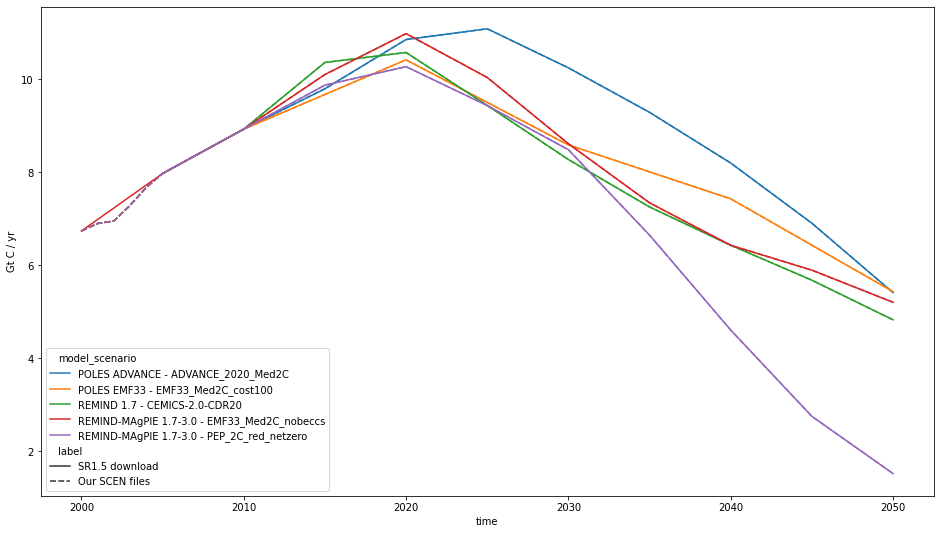

In [12]:
variable="Emissions|CH4"
unit = "Mt CH4 / yr"
variable="Emissions|BC"
unit = "Mt BC / yr"
variable="Emissions|OC"
unit = "Mt OC / yr"
variable=["Emissions|Sulfur", "Emissions|SOx"]
unit = "Mt S / yr"
# variable="Emissions|N2O"
# unit = "Mt N2ON / yr"
variable=["Emissions|CO2|*Fossil*", "Emissions|CO2|*Energy*"]
unit = "Mt CO2 / yr"


ax = plt.figure(figsize=(16, 9)).add_subplot(111)
sr15_subset = sr15_data.filter(
    variable=["Diagnostics*MAGICC6*Harmonized*{}".format(v) for v in variable],
    model_scenario=temperature["model_scenario"].unique().tolist()
)
sr15_subset["label"] = "SR1.5 download"
our_subset = sr15_scenfiles.filter(variable=variable, model_scenario=sr15_subset["model_scenario"].unique())
our_subset["label"] = "Our SCEN files"

(
    run_append([
        our_subset,
        sr15_subset,
    ]).filter(region="World", year=range(2000, 2050 + 1))
    .convert_unit(our_subset.get_unique_meta("unit", True))
    .lineplot(hue="model_scenario", style="label", ax=ax)
)

In [13]:
sr15_subset.timeseries()

time                                                                                                                                                                                          2000-01-01  \
category  label          model                 model_scenario                              region scenario            unit      variable                                           version                 
Lower 2C  SR1.5 download POLES ADVANCE         POLES ADVANCE - ADVANCE_2020_Med2C          World  ADVANCE_2020_Med2C  Mt CO2/yr Diagnostics|MAGICC6|Harmonized Input|Emissions|... 1                 NaN   
                         POLES EMF33           POLES EMF33 - EMF33_Med2C_cost100           World  EMF33_Med2C_cost100 Mt CO2/yr Diagnostics|MAGICC6|Harmonized Input|Emissions|... 1                 NaN   
Higher 2C SR1.5 download REMIND 1.7            REMIND 1.7 - CEMICS-2.0-CDR20               World  CEMICS-2.0-CDR20    Mt CO2/yr Diagnostics|MAGICC6|Harmonized Input|Emissions|... 1                 NaN   
Above 2C  SR1.5 download REMIND-MAgPIE 1.7-3.0 REMIND-MAgPIE 1.7-3.0 - EMF33_Med2C_nobeccs World  EMF33_Med2C_nobeccs Mt CO2/yr Diagnostics|MAGICC6|Harmonized Input|Emissions|... 1        24695.024695   
Lower 2C  SR1.5 download REMIND-MAgPIE 1.7-3.0 REMIND-MAgPIE 1.7-3.0 - PEP_2C_red_netzero  World  PEP_2C_red_netzero  Mt CO2/yr Diagnostics|MAGICC6|Harmonized Input|Emissions|... 1                 NaN   

time                                                                                                                                                                                        2001-01-01  \
category  label          model                 model_scenario                              region scenario            unit      variable                                           version               
Lower 2C  SR1.5 download POLES ADVANCE         POLES ADVANCE - ADVANCE_2020_Med2C          World  ADVANCE_2020_Med2C  Mt CO2/yr Diagnostics|MAGICC6|Harmonized Input|Emissions|... 1               NaN   
                         POLES EMF33           POLES EMF33 - EMF33_Med2C_cost100           World  EMF33_Med2C_cost100 Mt CO2/yr Diagnostics|MAGICC6|Harmonized Input|Emissions|... 1               NaN   
Higher 2C SR1.5 download REMIND 1.7            REMIND 1.7 - CEMICS-2.0-CDR20               World  CEMICS-2.0-CDR20    Mt CO2/yr Diagnostics|MAGICC6|Harmonized Input|Emissions|... 1               NaN   
Above 2C  SR1.5 download REMIND-MAgPIE 1.7-3.0 REMIND-MAgPIE 1.7-3.0 - EMF33_Med2C_nobeccs World  EMF33_Med2C_nobeccs Mt CO2/yr Diagnostics|MAGICC6|Harmonized Input|Emissions|... 1               NaN   
Lower 2C  SR1.5 download REMIND-MAgPIE 1.7-3.0 REMIND-MAgPIE 1.7-3.0 - PEP_2C_red_netzero  World  PEP_2C_red_netzero  Mt CO2/yr Diagnostics|MAGICC6|Harmonized Input|Emissions|... 1               NaN   

time                                                                                                                                                                                        2002-01-01  \
category  label          model                 model_scenario                              region scenario            unit      variable                                           version               
Lower 2C  SR1.5 download POLES ADVANCE         POLES ADVANCE - ADVANCE_2020_Med2C          World  ADVANCE_2020_Med2C  Mt CO2/yr Diagnostics|MAGICC6|Harmonized Input|Emissions|... 1               NaN   
                         POLES EMF33           POLES EMF33 - EMF33_Med2C_cost100           World  EMF33_Med2C_cost100 Mt CO2/yr Diagnostics|MAGICC6|Harmonized Input|Emissions|... 1               NaN   
Higher 2C SR1.5 download REMIND 1.7            REMIND 1.7 - CEMICS-2.0-CDR20               World  CEMICS-2.0-CDR20    Mt CO2/yr Diagnostics|MAGICC6|Harmonized Input|Emissions|... 1               NaN   
Above 2C  SR1.5 download REMIND-MAgPIE 1.7-3.0 REMIND-MAgPIE 1.7-3.0 - EMF33_Med2C_nobeccs World  EMF33_Med2C_nobeccs Mt CO2/yr Diagnostics|MAGICC

In [14]:
our_subset.timeseries()

time                                                                                                                                                                                 2000-01-01  \
climate_model label          model                 model_scenario                              region scenario            todo unit      variable                                                 
unspecified   Our SCEN files REMIND-MAgPIE 1.7-3.0 REMIND-MAgPIE 1.7-3.0 - PEP_2C_red_netzero  World  PEP_2C_red_netzero  SET  Gt C / yr Emissions|CO2|MAGICC Fossil and Industrial       6.735   
                             POLES ADVANCE         POLES ADVANCE - ADVANCE_2020_Med2C          World  ADVANCE_2020_Med2C  SET  Gt C / yr Emissions|CO2|MAGICC Fossil and Industrial       6.735   
                             REMIND-MAgPIE 1.7-3.0 REMIND-MAgPIE 1.7-3.0 - EMF33_Med2C_nobeccs World  EMF33_Med2C_nobeccs SET  Gt C / yr Emissions|CO2|MAGICC Fossil and Industrial       6.735   
                             POLES EMF33           POLES EMF33 - EMF33_Med2C_cost100           World  EMF33_Med2C_cost100 SET  Gt C / yr Emissions|CO2|MAGICC Fossil and Industrial       6.735   
                             REMIND 1.7            REMIND 1.7 - CEMICS-2.0-CDR20               World  CEMICS-2.0-CDR20    SET  Gt C / yr Emissions|CO2|MAGICC Fossil and Industrial       6.735   

time                                                                                                                                                                                 2001-01-01  \
climate_model label          model                 model_scenario                              region scenario            todo unit      variable                                                 
unspecified   Our SCEN files REMIND-MAgPIE 1.7-3.0 REMIND-MAgPIE 1.7-3.0 - PEP_2C_red_netzero  World  PEP_2C_red_netzero  SET  Gt C / yr Emissions|CO2|MAGICC Fossil and Industrial      6.8959   
                             POLES ADVANCE         POLES ADVANCE - ADVANCE_2020_Med2C          World  ADVANCE_2020_Med2C  SET  Gt C / yr Emissions|CO2|MAGICC Fossil and Industrial      6.8959   
                             REMIND-MAgPIE 1.7-3.0 REMIND-MAgPIE 1.7-3.0 - EMF33_Med2C_nobeccs World  EMF33_Med2C_nobeccs SET  Gt C / yr Emissions|CO2|MAGICC Fossil and Industrial      6.8959   
                             POLES EMF33           POLES EMF33 - EMF33_Med2C_cost100           World  EMF33_Med2C_cost100 SET  Gt C / yr Emissions|CO2|MAGICC Fossil and Industrial      6.8959   
                             REMIND 1.7            REMIND 1.7 - CEMICS-2.0-CDR20               World  CEMICS-2.0-CDR20    SET  Gt C / yr Emissions|CO2|MAGICC Fossil and Industrial      6.8959   

time                                                                                                                                                                                 2002-01-01  \
climate_model label          model                 model_scenario                              region scenario            todo unit      variable                                                 
unspecified   Our SCEN files REMIND-MAgPIE 1.7-3.0 REMIND-MAgPIE 1.7-3.0 - PEP_2C_red_netzero  World  PEP_2C_red_netzero  SET  Gt C / yr Emissions|CO2|MAGICC Fossil and Industrial       6.949   
                             POLES ADVANCE         POLES ADVANCE - ADVANCE_2020_Med2C          World  ADVANCE_2020_Med2C  SET  Gt C / yr Emissions|CO2|MAGICC Fossil and Industrial       6.949   
                             REMIND-MAgPIE 1.7-3.0 REMIND-MAgPIE 1.7-3.0 - EMF33_Med2C_nobeccs World  EMF33_Med2C_nobeccs SET  Gt C / yr Emissions|CO2|MAGICC Fossil and Industrial       6.949   
                             POLES EMF33           POLES EMF33 - EMF33_Med2C_cost100           World  EMF33_Med2C_cost100 SET  Gt C / yr Emissions|CO2|MAGICC Fossil and Industrial       6.949   
                             REMIND 1.7            REMIND 1.7 - CEMICS-2.0-CDR20               Wor

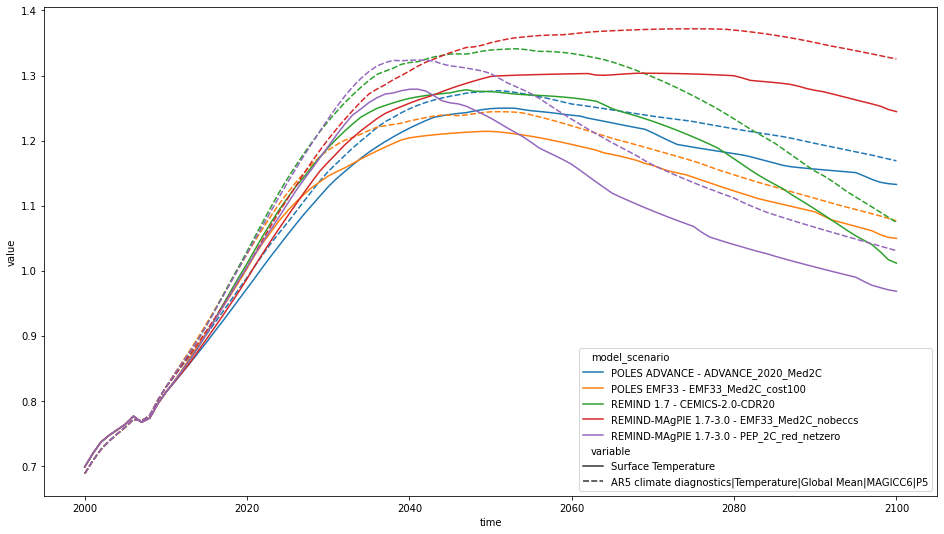

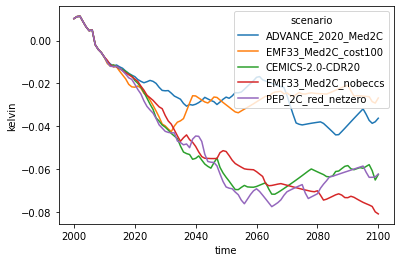

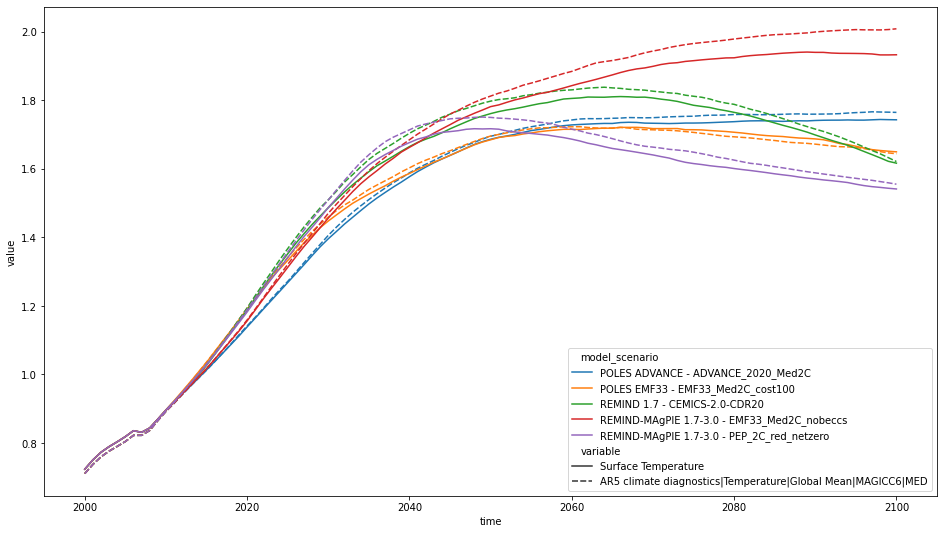

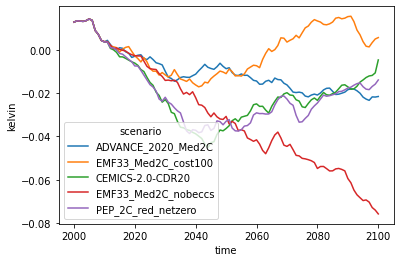

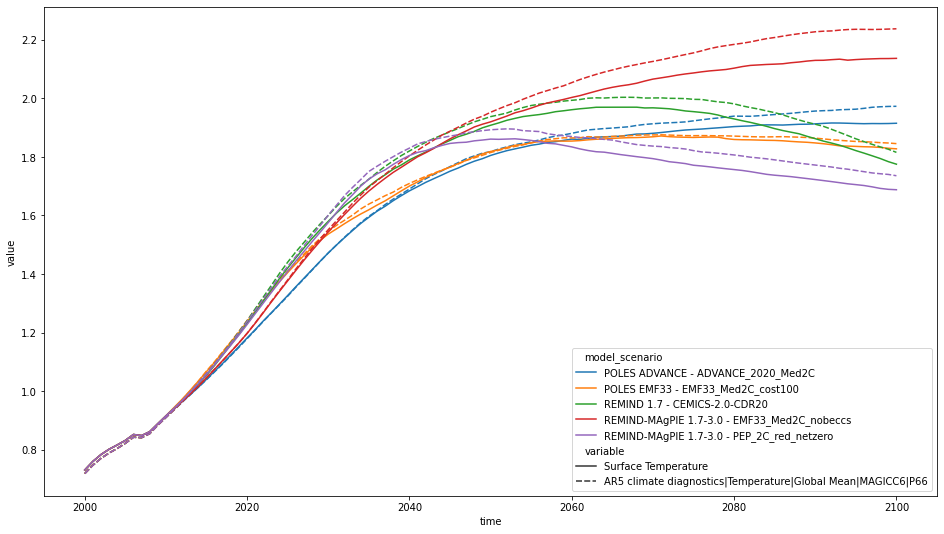

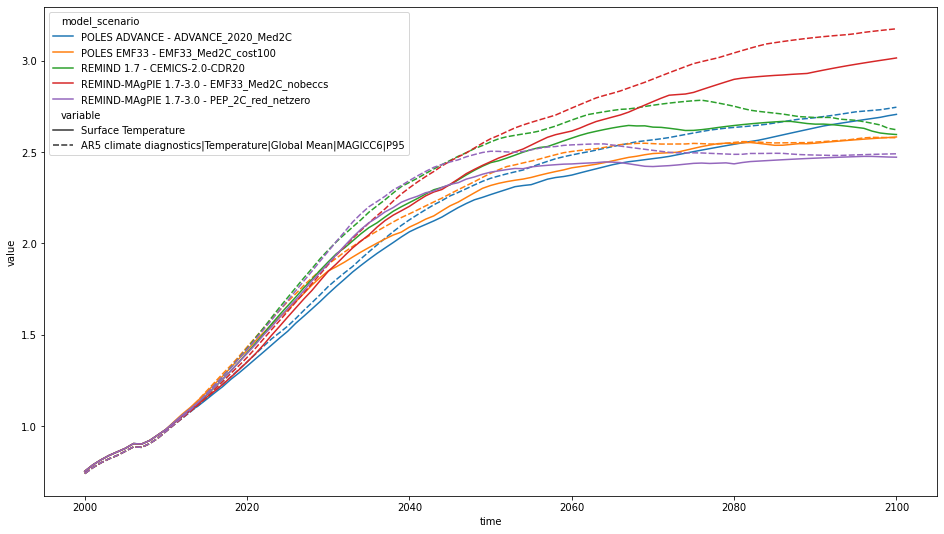

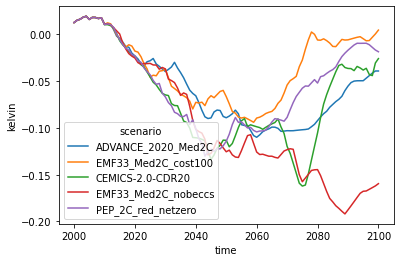

In [15]:
for variable, quantile in (
    ("AR5 climate diagnostics|Temperature|Global Mean|MAGICC6|P5", 0.05),
    ("AR5 climate diagnostics|Temperature|Global Mean|MAGICC6|MED", 0.5),
    ("AR5 climate diagnostics|Temperature|Global Mean|MAGICC6|P66", 0.66),
    ("AR5 climate diagnostics|Temperature|Global Mean|MAGICC6|P95", 0.95),
):
    sr15_subset = sr15_data.filter(
        variable=variable,
        model_scenario=temperature["model_scenario"].unique().tolist()
    )
    our_subset = (
        ScmRun(temperature.process_over("run_id", "quantile", q=quantile))
        .filter(model_scenario=sr15_subset["model_scenario"].unique())
    )
    
    ax = plt.figure(figsize=(16, 9)).add_subplot(111)
    run_append([
        our_subset,
        sr15_subset,
    ]).filter(year=range(2000, 2100 + 1)).lineplot(hue="model_scenario", style="variable", ax=ax)

    plt.show()
    
    (
        our_subset
        .drop_meta(['reference_period_start_year', 'todo', 'climate_model', 'reference_period_end_year'])
        .subtract(sr15_subset, op_cols={"variable": "Ours - SR1.5"})
    ).lineplot()
    plt.show()